In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Get the data
#airbnb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/S2 Ensemble Learning/AB_NYC_2019.csv")
airbnb = pd.read_csv("C:/DSBA/Term 2/Ensemble Learning/Projet/Projet 1/archive/AB_NYC_2019.csv")

#EDA

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb.shape

(48895, 16)

In [5]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
#Explore null values
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
total = airbnb.isnull().sum().sort_values(ascending=False)
percent = (airbnb.isnull().sum())/airbnb.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
last_review,10052,0.205583
reviews_per_month,10052,0.205583
host_name,21,0.000429
name,16,0.000327
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


In [8]:
#airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
airbnb.drop(['name','id','host_name'], axis=1, inplace=True)
airbnb.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   last_review                     38843 non-null  object 
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

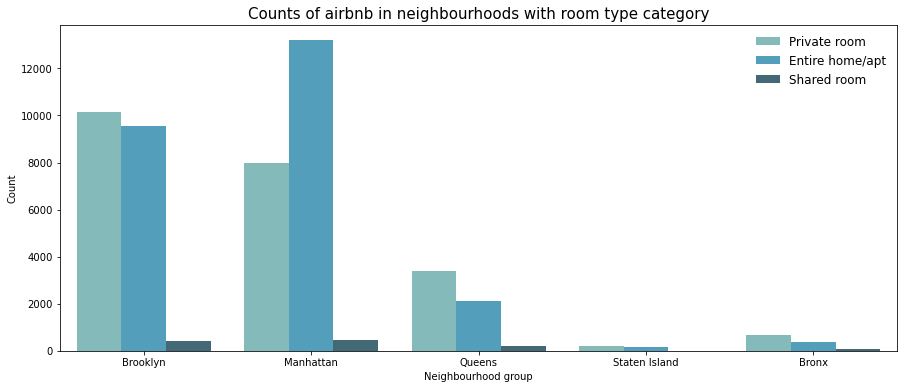

In [10]:
# Neighbourhood groups with counts with category room_type

plt.figure(figsize=(15,6))
sns.countplot(data=airbnb, x='neighbourhood_group', hue='room_type', palette='GnBu_d')
plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)

Text(0, 0.5, 'Price')

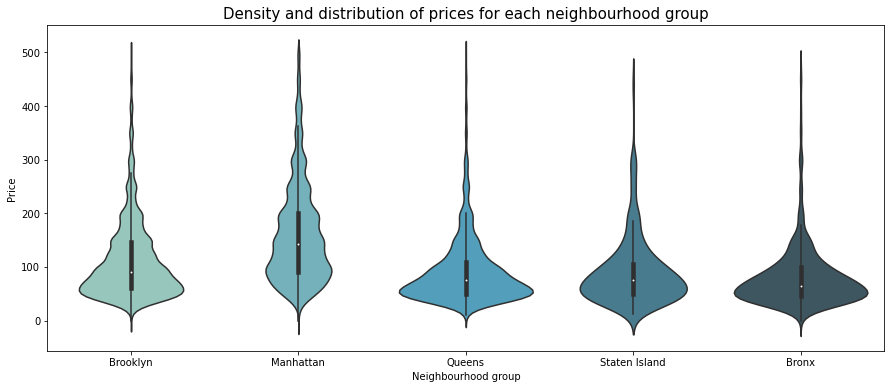

In [11]:
# Distribution of prices for each neighboorhood group
plt.figure(figsize=(15,6))
sns.violinplot(data=airbnb[airbnb.price <500], x='neighbourhood_group', y='price', palette='GnBu_d') #<500 to get rid of outliers
plt.title('Density and distribution of prices for each neighbourhood group', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")

In [12]:
#airbnb['last_review'] = pd.to_datetime(airbnb['last_review'],infer_datetime_format=True) 
#earliest = min(airbnb['last_review'])
#airbnb['last_review'] = airbnb['last_review'].fillna(earliest)
#airbnb['last_review'] = airbnb['last_review'].apply(lambda x: x.toordinal() - earliest.toordinal())

In [13]:
#fill the na in the reviews_per_month by 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb.reviews_per_month.isnull().sum()
airbnb.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot:>

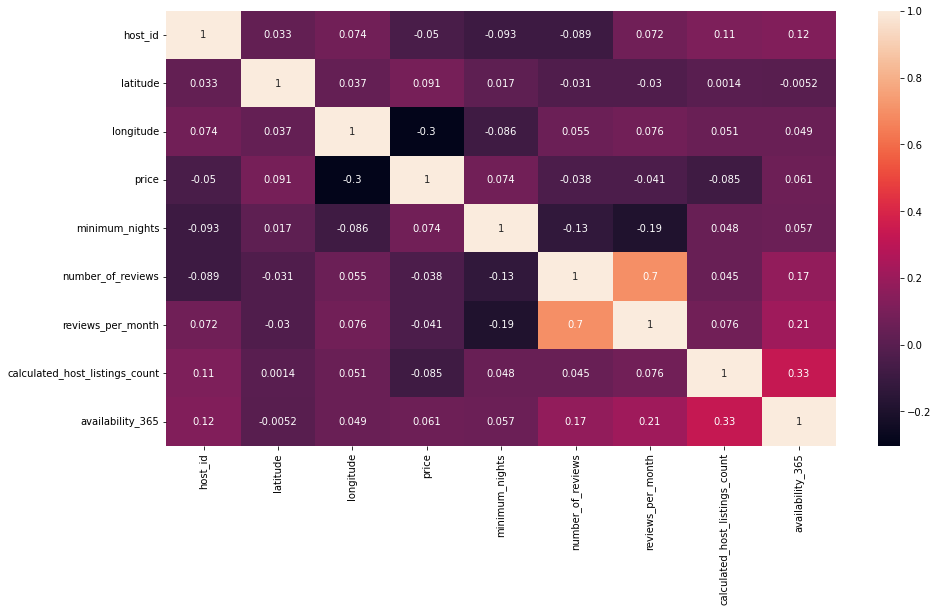

In [15]:
# display the correlation

corr = airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
#airbnb.columns

# Data Viz

In [16]:
airbnb.head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [17]:
print('In this dataset there are {} unique hosts renting out a total number of {} properties.'.format(len(airbnb['host_id'].unique()), airbnb.shape[0]))

In this dataset there are 37457 unique hosts renting out a total number of 48895 properties.


We will not use the host id as a feature

# Categorical variables

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood Group')

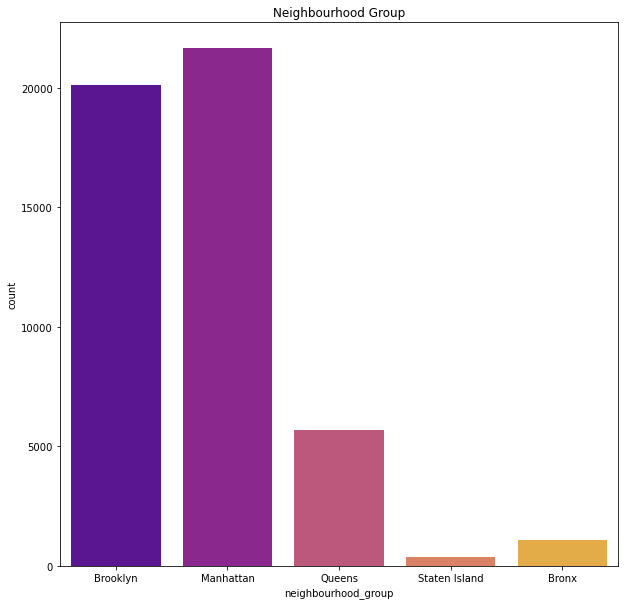

In [18]:
# The entries in the "neighbourhood_group"
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood')

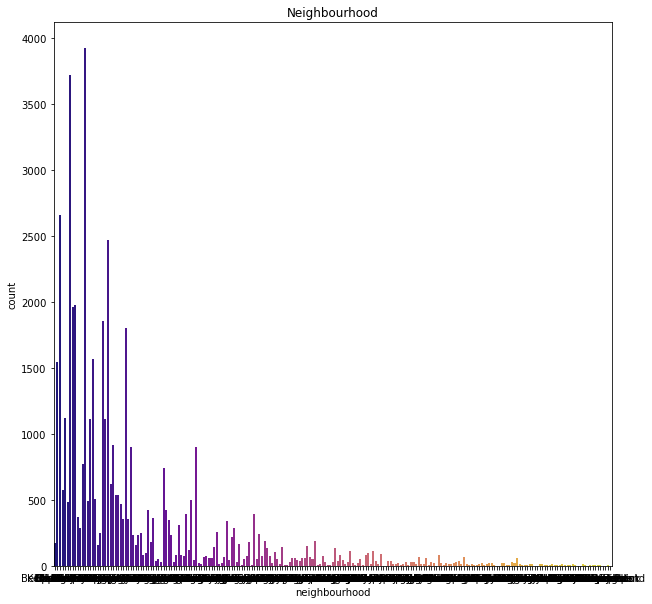

In [19]:
# The entries in the "neighbourhood"
sns.countplot(airbnb['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'room_type')

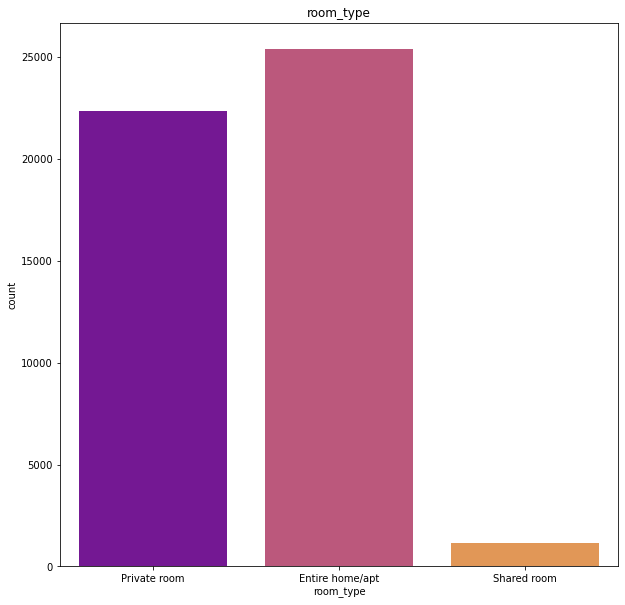

In [20]:
# The entries in the "room_type"
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('room_type')

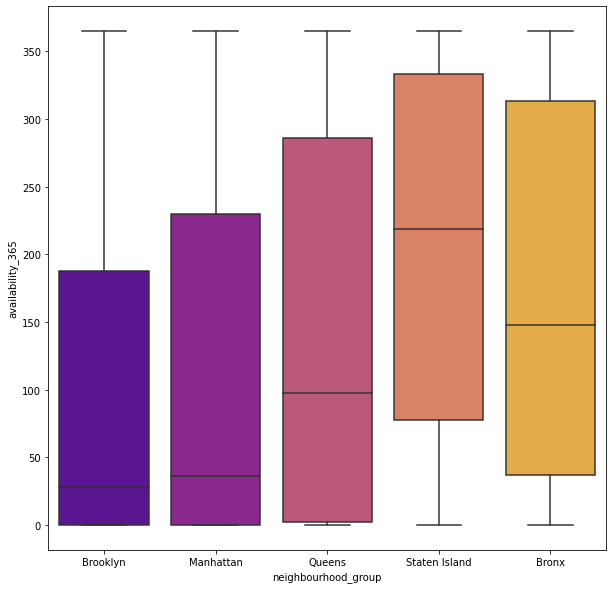

In [21]:
# Relation between neighbourgroup and Availability of Room
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


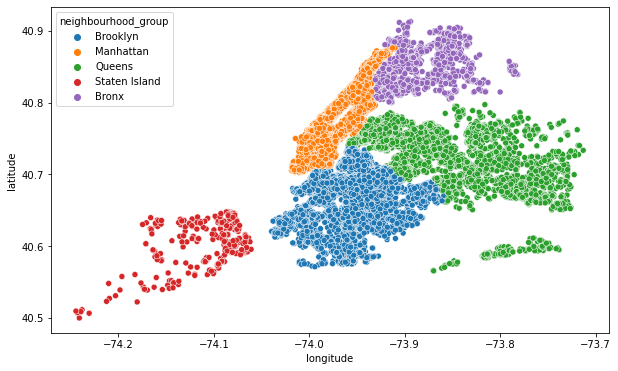

In [22]:
# map of neighbourhood group
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


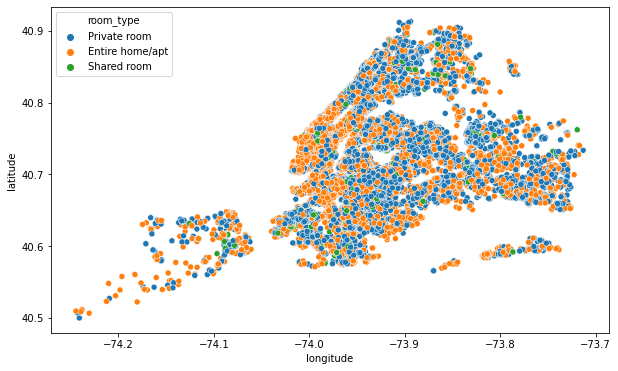

In [23]:
# map of the room type
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type)
plt.ioff()

In [14]:
# World Cloud
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

# Numerical Variables

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

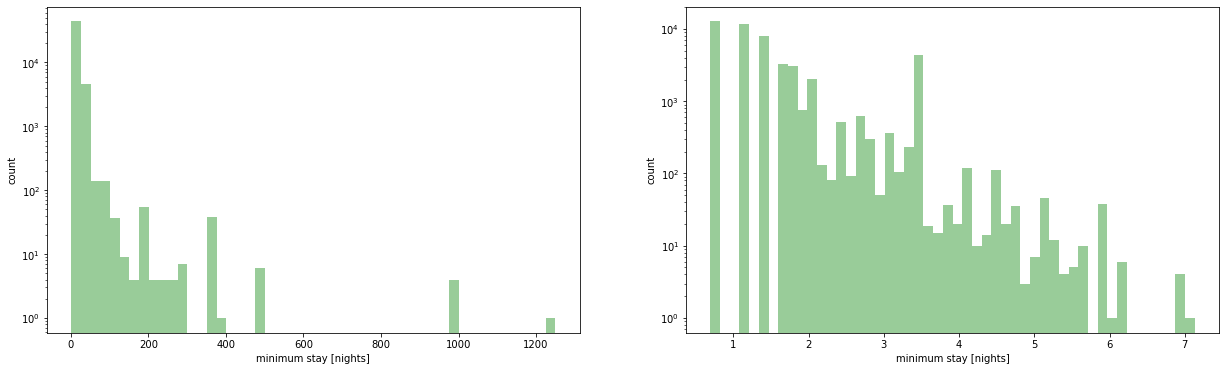

In [24]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))

sns.distplot(airbnb['minimum_nights'], rug=False, kde=False, color="green", ax = axes[0])
axes[0].set_yscale('log')
axes[0].set_xlabel('minimum stay [nights]')
axes[0].set_ylabel('count')

sns.distplot(np.log1p(airbnb['minimum_nights']), rug=False, kde=False, color="green", ax = axes[1])
axes[1].set_yscale('log')
axes[1].set_xlabel('minimum stay [nights]')
axes[1].set_ylabel('count')

# Feature Engineering

In [25]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   last_review                     38843 non-null  object 
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [26]:
#drop variables
#airbnb.drop(["host_id","latitude",'longitude'], axis=1, inplace=True)
airbnb.drop(["host_id"], axis=1, inplace=True)


In [27]:
airbnb["new_listing"] = 0
airbnb["new_listing"][airbnb["last_review"].isnull()] = 1
airbnb['last_review'].fillna(0,inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     48895 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
 12  new_listing                     

C:\Users\10352\AppData\Local\Temp\ipykernel_14140\2843919767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb["new_listing"][airbnb["last_review"].isnull()] = 1


In [28]:
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])
airbnb.dtypes
airbnb['review_recency'] = (airbnb.last_review.max() - airbnb.last_review).dt.days

airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,new_listing,review_recency
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,262
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,48
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1970-01-01,0.00,1,365,1,18085
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,3
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,231


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 365.0)

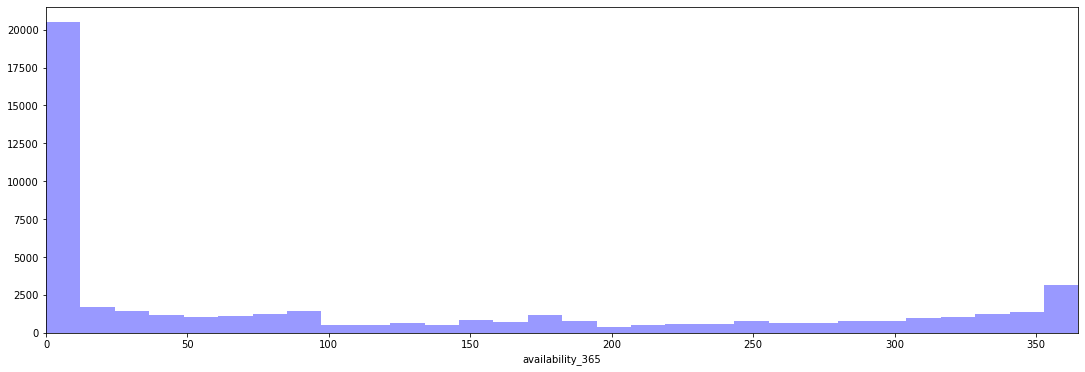

In [29]:
fig, axes = plt.subplots(1,1,figsize=(18.5, 6))
sns.distplot(airbnb['availability_365'], rug=False, kde=False, color="blue", ax=axes)
axes.set_xlabel('availability_365')
axes.set_xlim(0, 365)

In [30]:
airbnb['reviews_per_month'].value_counts()

0.00     10052
0.02       919
1.00       893
0.05       893
0.03       804
         ...  
9.53         1
9.74         1
6.06         1
8.25         1
10.54        1
Name: reviews_per_month, Length: 938, dtype: int64

In [31]:
airbnb['all_year_avail'] = airbnb['availability_365']>350
airbnb['low_avail'] = airbnb['availability_365']< 12
#airbnb['no_reviews'] = airbnb['reviews_per_month']==0  
# the reviews_per_month ==0 is actually beacause no data in the DB

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'new_listing', 'review_recency', 'all_year_avail',
       'low_avail'],
      dtype='object')

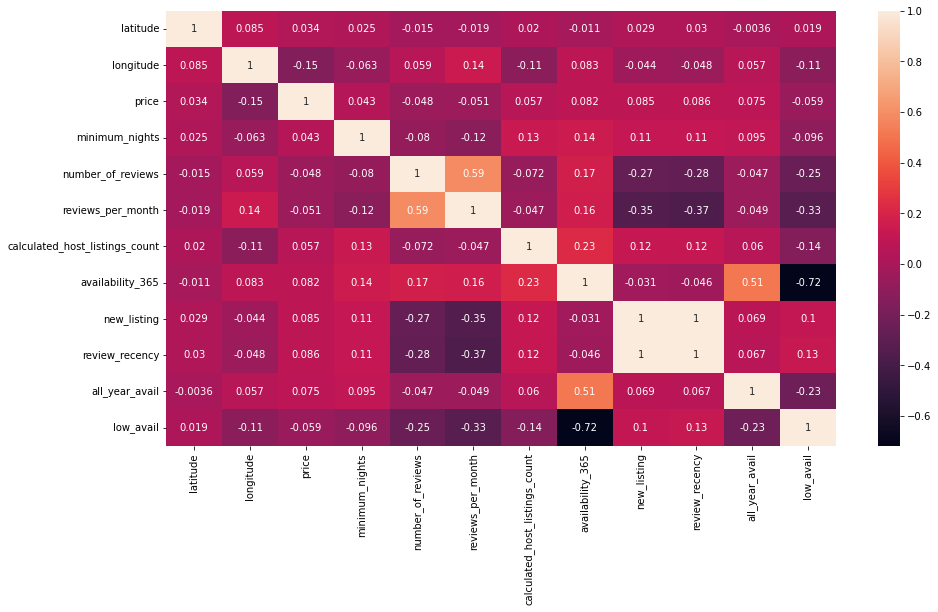

In [32]:
### Plotting correlation matrix 
corr = airbnb.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns

# Get variables prepared for modelling

In [33]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  object        
 1   neighbourhood                   48895 non-null  object        
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  object        
 5   price                           48895 non-null  int64         
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     48895 non-null  datetime64[ns]
 9   reviews_per_month               48895 non-null  float64       
 10  calculated_host_listings_count  48895 non-null  int64         
 11  av

In [34]:
airbnb['all_year_avail'] = airbnb['all_year_avail'].astype(object)
airbnb['low_avail'] = airbnb['low_avail'].astype(object)
#airbnb['no_reviews'] = airbnb['no_reviews'].astype(object)
airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  object        
 1   neighbourhood                   48895 non-null  object        
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  object        
 5   price                           48895 non-null  int64         
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     48895 non-null  datetime64[ns]
 9   reviews_per_month               48895 non-null  float64       
 10  calculated_host_listings_count  48895 non-null  int64         
 11  av

In [35]:
airbnb.drop(['last_review'], axis=1, inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  new_listing                     48895 non-null  int64  
 12  review_recency                  

In [36]:
categorical_features = airbnb.select_dtypes(include=['object'])
print('Categorical features: {}'.format(categorical_features.shape))

Categorical features: (48895, 5)


In [37]:
categorical_features_one_hot = pd.get_dummies(categorical_features)
categorical_features_one_hot.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,all_year_avail_False,all_year_avail_True,low_avail_False,low_avail_True
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [38]:
numerical_features =  airbnb.select_dtypes(exclude=['object'])
y = numerical_features.price
numerical_features = numerical_features.drop(['price'], axis=1)
print('Numerical features: {}'.format(numerical_features.shape))

Numerical features: (48895, 9)


In [39]:
X = np.concatenate((numerical_features, categorical_features_one_hot), axis=1)

In [40]:
#We will transform to logarithm and predict that
y = np.log(airbnb['price']+1)

# Test train split

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# check the dimensions for the datasets
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (39116, 242)
Dimensions of the training target vector: (39116,)
Dimensions of the test feature matrix: (9779, 242)
Dimensions of the test target vector: (9779,)


In [42]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  new_listing                     48895 non-null  int64  
 12  review_recency                  

# Rescale the variables

In [43]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Models

**Random Forest**

In [212]:
#Prepairng a Decision Tree Regression
from sklearn.model_selection import GridSearchCV
#Perform a split
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.3, random_state=7)

#Initialize model
rf = RandomForestRegressor(random_state=7)

# define the hyperparameters to tune
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# perform grid search with 5-fold cross validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# print the best parameters found by grid search
print(grid_search.best_params_)

# use the best estimator to make predictions on test set
y_pred = grid_search.predict(X_test)

# evaluate the model using r2 score
print('R2 score:', r2_score(y_test, y_pred))

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   6.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   6.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   7.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   8.5s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   7.6s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   8.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   6.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   6.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   6.8s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   6.6s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=6; total time=   6.7s
[CV] END max_depth=2, min_samples_l

[CV] END max_depth=2, min_samples_leaf=4, min_samples_split=10; total time=   9.1s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=2; total time=   8.8s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=2; total time=   9.2s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=2; total time=   9.0s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=2; total time=   9.1s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=2; total time=   8.7s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=4; total time=   8.9s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=4; total time=   9.8s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=4; total time=   8.5s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=4; total time=   8.8s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=4; total time=   9.5s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=6; total time=  11.7s
[CV] END max_de

[CV] END max_depth=4, min_samples_leaf=3, min_samples_split=10; total time=  16.1s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=2; total time=  15.1s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=2; total time=  15.9s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=2; total time=  16.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=2; total time=  15.9s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=2; total time=  15.8s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=  16.1s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=  16.4s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=  15.8s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=  16.0s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=  16.1s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=6; total time=  16.4s
[CV] END max_de

[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=10; total time=  16.3s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=2; total time=  16.1s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=2; total time=  16.1s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=2; total time=  16.8s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=2; total time=  17.1s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=2; total time=  17.6s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=4; total time=  17.5s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=4; total time=  17.1s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=4; total time=  19.6s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=4; total time=  16.6s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=4; total time=  16.7s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=6; total time=  16.2s
[CV] END max_de

[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=10; total time=  21.7s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=  20.3s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=  21.7s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=  22.6s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=  17.7s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=  19.4s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=4; total time=  23.6s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=4; total time=  23.5s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=4; total time=  22.2s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=4; total time=  21.1s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=4; total time=  21.1s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6; total time=  21.6s
[CV] END max_de

[CV] END max_depth=8, min_samples_leaf=5, min_samples_split=10; total time=  15.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  14.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  14.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  14.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  15.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  14.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4; total time=  14.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4; total time=  14.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4; total time=  14.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4; total time=  14.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4; total time=  14.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6; total time=  15.1s
[CV]

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=  14.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=  14.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=  14.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=  14.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=  14.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=  14.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=  14.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4; total time=  14.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4; total time=  14.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4; total time=  14.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4; total time=  14.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4; total time=  14.2s
[C

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(max_depth=10 , min_samples_leaf= 4, min_samples_split= 2)
rf.fit(X_train, y_train)
Z = rf.predict(X_test)
accuracy=rf.score(X_test,y_test)
r2 = r2_score(y_test, Z)
print(accuracy)
print(r2)

0.5889748243022828
0.5889748243022828


In [46]:
# real price
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(np.exp(y_test)-1, np.exp(Z)-1))
print("RMSE:", rmse)

RMSE: 222.91889842555398


In [47]:
# log-transformation
rmse = np.sqrt(mean_squared_error(y_test, Z))
print("RMSE:", rmse)

RMSE: 0.4432023289580497


**Extremely random forest**

In [62]:
#from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

#Perform a split
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.3, random_state=7)

clf = ExtraTreesRegressor()

# define the hyperparameters to tune
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3, 4]
}

# perform grid search with 5-fold cross validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# print the best parameters found by grid search
print(grid_search.best_params_)

# use the best estimator to make predictions on test set
y_pred = grid_search.predict(X_test)

# evaluate the model using r2 score
print('R2 score:', r2_score(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=  12.6s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=  11.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=  11.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=  11.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=  10.8s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=  11.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=  11.5s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=  11.5s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=  11.5s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=  11.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=6; total time=  10.9s
[CV] END max_depth=2, min_samples_le

[CV] END max_depth=4, min_samples_leaf=3, min_samples_split=6; total time=  12.1s
[CV] END max_depth=4, min_samples_leaf=3, min_samples_split=6; total time=  12.8s
[CV] END max_depth=4, min_samples_leaf=3, min_samples_split=6; total time=  15.4s
[CV] END max_depth=4, min_samples_leaf=3, min_samples_split=6; total time=  12.2s
[CV] END max_depth=4, min_samples_leaf=3, min_samples_split=6; total time=  12.1s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=2; total time=  12.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=2; total time=  13.4s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=2; total time=  13.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=2; total time=  12.5s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=2; total time=  12.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=  12.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=  12.3s
[CV] END max_dep

[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=4; total time=  19.1s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=4; total time=  15.3s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=4; total time=  15.8s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=4; total time=  15.4s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=4; total time=  15.1s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6; total time=  16.3s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6; total time=  16.0s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6; total time=  21.0s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6; total time=  16.5s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6; total time=  16.6s
[CV] END max_depth=8, min_samples_leaf=3, min_samples_split=2; total time=  21.9s
[CV] END max_depth=8, min_samples_leaf=3, min_samples_split=2; total time=  18.0s
[CV] END max_dep

In [70]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
clf = ExtraTreesRegressor(max_depth=10 , min_samples_leaf= 4, min_samples_split=6)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
r2 = r2_score(y_test, Z)
print(accuracy)
print(r2)

0.5607917451146849
0.5607917451146849


In [71]:
# real price
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(np.exp(y_test)-1, np.exp(Z)-1))
print("RMSE:", rmse)

RMSE: 215.1743286647094


**Boosting**
Use the previous RF as the weak learner

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
# The best to way to test the parameter is trying as many n_estimators as possible but keep the increments the same (10 here)
# try fewer learning rate

params = {
     'n_estimators':[10, 30, 50,70, 90, 110], #To fill
     'learning_rate':[0.01, 0.05, 0.1, 0.15]}

grid_cv = GridSearchCV(AdaBoostRegressor(base_estimator=rf), param_grid= params, cv=3)
#grid_search = GridSearchCV(BaggingClassifier(), param_grid=pgrid, cv=10)
grid_cv.fit(X_train, y_train) 
print(grid_cv.best_params_)
print(grid_cv.best_estimator_.score(X_train, y_train))

print('The best parameters values are ', grid_cv.best_params_) 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.3, random_state=7)

#rf = RandomForestRegressor(max_depth=10 , min_samples_leaf= 4, min_samples_split= 2)
# define the hyperparameters to tune
params = {
     'n_estimators':[10, 30, 50,70, 90, 110], #To fill
     'learning_rate':[0.05, 0.1, 0.15]}
# perform grid search with 5-fold cross validation
grid_search = GridSearchCV(AdaBoostRegressor(base_estimator=rf), param_grid=params, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# print the best parameters found by grid search
print(grid_search.best_params_)

# use the best estimator to make predictions on test set
y_pred = grid_search.predict(X_test)

# evaluate the model using r2 score
print('R2 score:', r2_score(y_test, y_pred))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ................learning_rate=0.05, n_estimators=10; total time= 2.1min
[CV] END ................learning_rate=0.05, n_estimators=10; total time= 2.0min
[CV] END ................learning_rate=0.05, n_estimators=10; total time= 1.9min
[CV] END ................learning_rate=0.05, n_estimators=30; total time= 6.1min
[CV] END ................learning_rate=0.05, n_estimators=30; total time= 5.9min
[CV] END ................learning_rate=0.05, n_estimators=30; total time= 7.8min
[CV] END ................learning_rate=0.05, n_estimators=50; total time=14.8min
[CV] END ................learning_rate=0.05, n_estimators=50; total time=13.2min
[CV] END ................learning_rate=0.05, n_estimators=50; total time=13.4min
[CV] END ................learning_rate=0.05, n_estimators=70; total time=24.4min
[CV] END ................learning_rate=0.05, n_estimators=70; total time=24.5min
[CV] END ................learning_rate=0.05, n_e